# Review - Categorical Cross Entropy

Taken from: http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Cross-entropy loss, or log loss, **measures the performance of a classification model whose output is a probability value between 0 and 1.** 
- Cross-entropy loss increases as the predicted probability diverges from the actual label. 
- So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. 
- A perfect model would have a log loss of 0.

The graph above shows the range of possible loss values given a **true observation (isDog = 1)**. 
- As the predicted probability approaches 1, log loss slowly decreases. 
- As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predications that are confident and wrong!

Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing.

### Math
In binary classification, where the number of classes M equals 2, cross-entropy can be calculated as:

$-{(y\log(p) + (1 - y)\log(1 - p))}$

If M>2 (i.e. multiclass classification), we calculate a separate loss for each class label per observation and sum the result.

$-\sum_{c=1}^My_{o,c}\log(p_{o,c})$

- M: number of classes (dog, cat, fish)
- log: the natural log
- y: binary indicator (0 or 1) if class label c is the correct classification for observation o
- p: predicted probability observation o is of class c

In [66]:
from sklearn.linear_model import LogisticRegression
model = LinearRegression()
model.fit(x,y)
model.predict()

In [4]:
def add_numbers(y,x=5):
    return x+y

add_numbers(y=5)

10

In [14]:
import pandas as pd

In [18]:
df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [25]:
x = np.random.randint(-10,10,10)
x

array([ -8,   1,   9,   6, -10,  -8,  -6,   4,  -5,  -6])

In [35]:
xi = [1 if i in [1,2,3,4] else 0 for i in x]
xi

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [61]:
df[['latitude','longitude']].head()

,latitude,longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


In [62]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
def multiply(row, var2 = 'pop'):
    return row['latitude'] + row['longitude'] 

In [64]:
df.apply(multiply, axis=1)

0       -84.35
1       -84.36
2       -84.39
3       -84.40
4       -84.40
5       -84.40
6       -84.41
7       -84.41
8       -84.42
9       -84.41
10      -84.41
11      -84.41
12      -84.41
13      -84.42
14      -84.41
15      -84.41
16      -84.42
17      -84.42
18      -84.42
19      -84.43
20      -84.42
21      -84.42
22      -84.43
23      -84.43
24      -84.43
25      -84.43
26      -84.43
27      -84.43
28      -84.44
29      -84.44
         ...  
20610   -82.46
20611   -82.45
20612   -82.48
20613   -82.46
20614   -82.46
20615   -82.46
20616   -82.45
20617   -82.47
20618   -82.49
20619   -82.55
20620   -82.43
20621   -82.46
20622   -82.44
20623   -82.34
20624   -82.37
20625   -82.40
20626   -82.25
20627   -82.19
20628   -82.38
20629   -82.27
20630   -82.03
20631   -82.07
20632   -82.19
20633   -82.34
20634   -82.29
20635   -81.61
20636   -81.72
20637   -81.79
20638   -81.89
20639   -81.87
Length: 20640, dtype: float64

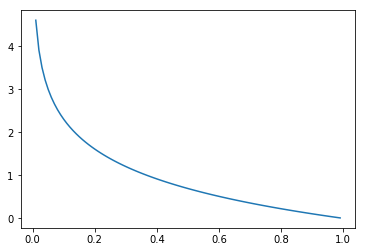

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log
predicted_probas = np.arange(0.01,1,0.01) 
actuals = np.ones(len(predicted_probas))

#yhat is actual class
#y is predicted probability
def CrossEntropy(yHat, y):
    if yHat == 1:
        #if class is 1 take first class
        return -log(y)
    else:
        return -log(1 - y)

cross_entropy_loss = [CrossEntropy(1, pred) for pred in predicted_probas]
plt.plot(predicted_probas, cross_entropy_loss)
plt.show()

In [66]:
print(CrossEntropy(0, 0.001))
print(CrossEntropy(1, 0.999))

0.00100050033358
0.00100050033358
